In [109]:
import numpy as np
import matplotlib.pyplot as plt

In [110]:
from math import sqrt


Se ha mencionado que los bonos sobre par y bajo par convergen a la par. 

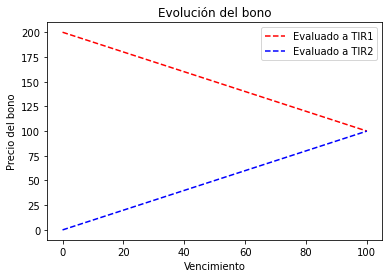

In [111]:
t = np.arange(0., 110, 20) #generar valores para un intervalo, marcando las distancias en x
fig, ax = plt.subplots()

plt.plot(t, -t+200, 'r--', t, t, 'b--')

#"--" dashes, "bs", squares, "^", triangles

ax.set_title('Evolución del bono')
ax.legend(['Evaluado a TIR1', 'Evaluado a TIR2'],loc='best')


plt.ylabel('Precio del bono')
plt.xlabel('Vencimiento')


plt.show()



Es natural preguntar comparando bonos cuál produce mejor rendimiento. Respuesta: ver la evolución de la tasa de interés. Un bono con *prima* mantiene su valor mejor cuando las tasas aumentan. 
Se invierte en un bono para generar rendimientos o intereses futuros, es importante señalar que un *horizonte de inversión* es el plazo por el cual se invertirá el dinero, que puede ser diferente que la temporalidad del bono. La *TIR* no siempre funciona para medir adecuadamente los rendimientos en el horizonte porque depende de las tasas que se rijan durante este periodo. Más adelante se verá cómo medir más precisamente los rendimientos. 

# Duración y convexidad

El *riesgo de tasa de interés* surge  cuando hay variaciones en las tasas de títulos de renta fija. ¿Por qué cambiarían los precios de los bonos? Por el riesgo de crédito, por premio o descuento a medida que se acerca el vencimiento y por los cambios en las tasa de interés, en esto nos centramos a continuación. La *duración* es una medida del cambio del precio del bono considerando cambios en la *TIR* (tasas). Los factores que influyen en esta medida son el vencimiento, los cupones y la periodicidad del cupón. *Ceteris paribus* influyen como sigue: a mayor plazo, mayor volatilidad porque el valor presente de los flujos es menor; cupones bajos implica mayor volatilidad porque hay menos participación en la amortización total; mayor periodicidad de cupones, menor volatilidad porque los cambios en la tasa son menores al ser menor la tasa equivalente (la que produce el mismo rendimiento a diferente plazo). 

Para calcular la variación en la tasa respecto al precio de un bono (o instrumento de mercado de dinero) se calcula la derivada

$$P=\frac{C_{1}}{1+r}+\frac{C_{2}}{(1+r)^2}+\dots+ \frac{C_{n}}{(1+r)^n}+\frac{VN}{(1+r)^n}$$

$$\frac{dP}{dr}=-\frac{C_{1}}{(1+r)^2}-\frac{2C_{2}}{(1+r)^3}-\dots-\frac{nC_{n}}{(1+r)^{n+1}}-\frac{nVN}{(1+r)^{n+1}}$$

Esta es la duración Macaulay (derivada entre el precio); la siguiente, dividiendo entre *-(1+r)*, es la duración *modificada*.

$$(\frac{1}{p})\frac{dP}{dr}=(\frac{1}{p})[-\frac{C_{1}}{(1+r)^2}-\frac{2C_{2}}{(1+r)^3}-\dots-\frac{nC_{n}}{(1+r)^{n+1}}-\frac{nVN}{(1+r)^{n+1}}]$$

Simplificicando(modificada):

$$(\frac{1}{p})\frac{dP}{dr}=(-\frac{1}{1+r})[\frac{C_{1}}{(1+r)}+\frac{2C_{2}}{(1+r)^2}+\dots+\frac{nC_{n}}{(1+r)^{n}}+\frac{nVN}{(1+r)^{n}}] (\frac{1}{p})$$

Lo cual quiere decir que $(\frac{1}{p})\frac{dP}{dr}=-Dur.modificada$ y que $Dur.modificada=\frac{-Dur.Macaulay}{(1+r)}$

Al final $$Dur.Macaulay=\frac{1}{p}[\sum _{t=1} ^{n} \frac{tc_{2}}{(1+r)^t}+\frac{nVN}{(1+r)^n}]$$ 

O equivalentemente:  $$Dur.Macaulay=\frac{1+r}{r}-\frac{1+r+[n(C-r)]}{C[(1+r)^n-1]+r}$$

Hay varias interpretaciones: 

1. La duración representa la cantidad de años para recuperar la inversión. 
2. La duración como centro de gravedad porque se consideran pagos en el plazo y al final, entonces al final se compensa la balanza que estaba cargada a la izquierda (pensando en una recta real). 
3. La duración como la proporción total de los cupones descontados respecto al precio del bono.  
4. La duración modificada es el cambio porcentual aproximado en el precio del bono como consecuencia de un cambio de 100 puntos básicos en la *TIR* exigida.

Notar que como la derivada es negativa hay una relación inversa: sube la tasa baja el precio y viceversa.

La duración modificada es como valuar un -cupón cero con nominal de duración Macaulay. 

Ejemplo: si un bono tiene duración modificada de 5, entonces una variación porcentual de un punto porcentual en la *TIR* provoca una variación del 5% en el precio.

La duración monetaria nos dice cuánto en valor varía el precio.
$$dP=-DM(P)(dTIR)$$

Si por ejemplo, tenemos una duración de $5$ para un bono de nominal $100$ con tasa de $10 \% $ , entonces su duración modificada es $\frac{5}{1.1}=4.54$. Sirve para predecir las variaciones porcentuales. En el mismo ejemplo, si la tasa sube 100 puntos base (1%) entonces el precio varía $-4.54(.01)=-.0455$, o sea $4.54\%$ baja de precio. Para la duración monetaria sería $-4.54(.01)(100)=-4.54$ y el bono vale $95.46$

Veamos las duraciones en código:



In [140]:
def duración(P,C,r,n,VN): #defirnir parámetros de la función, o sea, del bono
    sum=0 #la suma inicia en 0
    for d in range(1,n): #definir una variable que recorra el rango-1
        d = (d*C)/(P*(1+r)**(d)) #usar la variable en la función para que la recorra
        print(d," ") #opcional: ver valores hasta n-1
        sum = sum + d #ir sumando todos
    else:
        print("La duración del bono es")
        
    return  sum +(n*(C+VN))/(P*(1+r)**(n)) #sumar el n-1 y el n periodo
     
 
    

Sea un bono con nominal de $100$, cotizado a la par, cupones de $10$, tasa de $10\%$ a $5$ años. 

In [151]:
duración(100,10,.10,5,100)

0.0909090909090909  
0.16528925619834708  
0.22539444027047323  
0.2732053821460282  
La duración del bono es


4.1698654463492915

Notar que para calcular la duración necesitamos el precio, mismo que ya está en código en *Análisis de bonos*. La duración es negativa pero como representa una relación inversa entre precio y tasas, es más intuitivo dejarla en positiva porque al final lo que importa es la variación y no el signo, pues el signo lo determina la situación (sube tasa baja precio, viceversa). Aplica también para la duración monetaria.

Ahora la equivalencia para la duración Macaulay en código (método alternativo): 

In [149]:
def duración2(C,r,n): #C no es cupón, es tasa del cupón
    return ((1+r)/r)-((1+r+n*C-n*r)/(C*((1+r)**(n)-1) + r))

In [150]:
duración2(.10,.10,5)

4.169865446349295

Para la duración modificada es más sencillo, teniendo la duración Macaulay:

In [137]:
def duraciónmod (D,r):
    return D/(1+r)

In [143]:
duraciónmod(4.1698654463492915,.1)

3.7907867694084465

El $3.790$ representa la variación porcentual del precio del bono ante cambios en la *TIR*, como se vio anteriormente.

En ocasiones la duración no es lo suficiente. Ocurre que cuando los cambios en las tasas de interés son muy grandes la duración no es una medida muy precisa porque la primera derivada del precio respecto a la tasa mide variaciones *pequeñas*. La *convexidad* se aplica cuando la segunda derivada evaluada en un punto es positiva; mientra que la *concavidad* se sigue de la evaluación en un punto de la segunda derivada, dando como resultado un número negativo. Como la duración es negativa, se sigue que la derivada de la duración es positiva (porque en el denominador está la tasa y por tanto cada derivada superior cambia de signo alternando), entonces hay convexidad en la derivada de la duración respecto a la tasa. 

La interpretación de la convexidad:

1. La convexidad representa la diferencia entre el precio del bono y el precio del bono estimado por la duración modificada.
2. La convexidad representa la medición del cambio en el precio no atribuible a la duración modificada.
3. La convexidad representa la medición del cambio en la duración modificada ante cambios en la *TIR*.
4. La convexidad es la duración de la duración modificada.

$$Conv=\frac{1}{P}\frac{d^2P}{dr^2}= \frac{1}{P}\frac{dP}{dr}[\sum _{t=1} ^{n} \frac{tc_{2}}{(1+r)^t}+\frac{nVN}{(1+r)^n}](\frac{1}{1+r})$$

Que da como resultado $$Conv=\frac{[2C(1+r)^2((1+r)^n-\frac{1+r+rn}{(1+r)})]+[n(n+1)r^2(r-C)]}{r^2(1+r)^2[C((1+r)^n-1)+r]}$$

Si es un bono cupón cero $(C=0)$: $$Conv=\frac{n(n+1)}{(1+r)^2}$$

El código para convexidad:

In [223]:
def convexidad(C,r,n): #notar que el cupón hace referencia a la tasa del cupón
    return ((2*C*(1+r)**2)*((1+r)**(n)-(1+r+r*n)/(1+r))+(n*(n+1)*r**2*(r-C))) / ((r**(2)*(1+r)**(2))*(C*(1+r)**n-C+r))

Sea un bono que expira en 26 años, paga cupones semestrales de $8\%$ anual con rendimiento (*TIR*) de $6\%$ anual. Como no se menciona el precio del bono ni su valor nominal, usemos el código equivalente para duración: 

In [200]:
duración2(.04,.03,52), duración2(.04,.03,52)/2, duraciónmod(12.764143978921453,.03)

(25.528287957842906, 12.764143978921453, 12.392372795069372)

Esta es la duración semestral, para la duración anual dividir entre 2,teniendo duración anual de $12.764$ y duración modificada anual de $12.393$. 

Ahora la convexidad:

In [225]:
convexidad(.04,.03,52), convexidad(.04,.03,52)/4

(931.161473049579, 232.79036826239474)

Es una convexidad semestral, por lo que la anual consiste en dividir entre el cuadrado de los periodos, o sea, entre $4$. Teniendo una convexidad de $232.79$ anual.

Interpretación: 

Por cada 100 puntos pase, el cambio en el precio, aumento en este caso, del bono cambiando la tasa de interés: 

$$-12.76(0.01)(100)= -12.76\%$$

y para la convexidad: 

$$\Delta(\%)P(Convexidad) = \frac{1}{2}Conv(.0001)(100)=1.16\% $$

De tal forma que la variación del precio ante cambios (subida en este caso) de un punto porcentual (100 puntos base) es $-12.76\%+1.16\%=-11.6\%$.  En cambio si utilizamos la duración modificada, se tendría que la variación total del precio es $-12.39\%+1.16\%=-11.23\%$, es decir, hay menos margen de pérdidas.

Ante subidas en las tasas, la convexidad reduce las variaciones.